In [1]:
# Importing libraries
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline


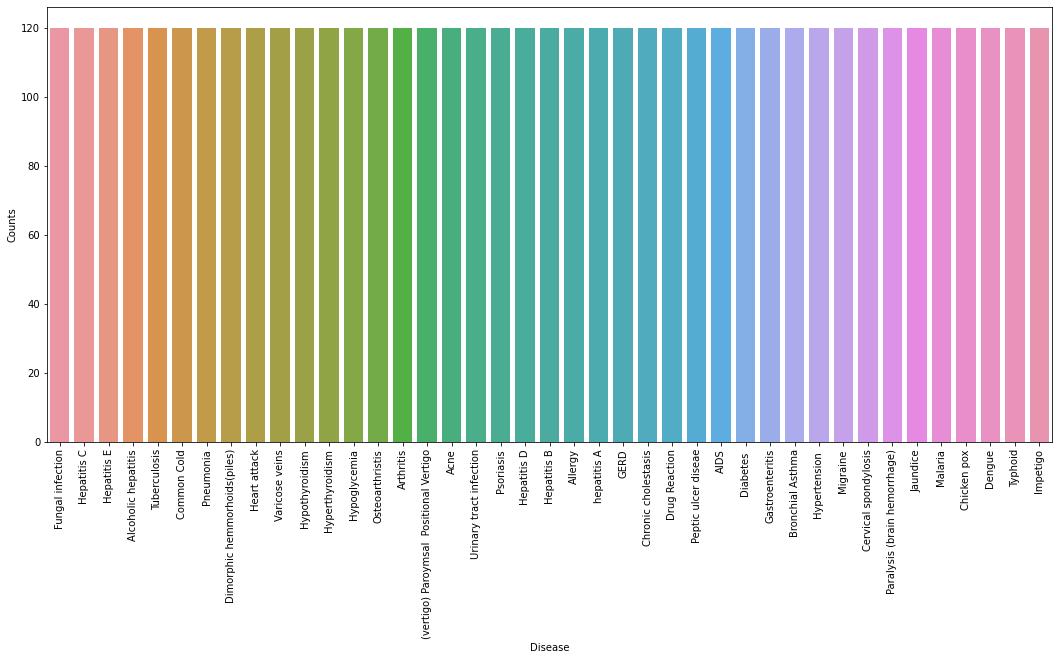

In [2]:
# Reading the train.csv by removing the
# last column since it's an empty column
DATA_PATH = "Training.csv"
data = pd.read_csv(DATA_PATH).dropna(axis = 1)

# Checking whether the dataset is balanced or not
disease_counts = data["prognosis"].value_counts()
temp_df = pd.DataFrame({
	"Disease": disease_counts.index,
	"Counts": disease_counts.values
})

plt.figure(figsize = (18,8))
sns.barplot(x = "Disease", y = "Counts", data = temp_df)
plt.xticks(rotation=90)
plt.show()


In [3]:
X = data.iloc[:,:-1]
y = data.iloc[:, -1]

In [4]:
nb_model = GaussianNB()
nb_model.fit(X,y)


GaussianNB()

In [5]:
X_train, X_test, y_train, y_test =train_test_split(
X, y, test_size = 0.2, random_state = 24)

In [6]:
def new_func():
    print(nb_model.predict(X_train))

new_func()

['Fungal infection' 'Heart attack' 'Hepatitis D' ... 'Osteoarthristis'
 'Diabetes ' 'Drug Reaction']


In [8]:
print(nb_model.predict(X_train))

['Fungal infection' 'Heart attack' 'Hepatitis D' ... 'Osteoarthristis'
 'Diabetes ' 'Drug Reaction']


In [22]:
print(nb_model.predict('itching','itching'))

TypeError: predict() takes 2 positional arguments but 3 were given

In [23]:
print(y_train)

2993       Fungal infection
2899           Heart attack
639             Hepatitis D
1288    Peptic ulcer diseae
1672    Chronic cholestasis
               ...         
2193               Jaundice
3473           Heart attack
343         Osteoarthristis
899               Diabetes 
4514          Drug Reaction
Name: prognosis, Length: 3936, dtype: object


In [24]:
y_train.shape

(3936,)

In [10]:
X_train.shape

(3936, 132)

In [40]:
#print(X_train[0:1])
test = X_train[0:1]


In [44]:
print(y_train[1:10])

2899           Heart attack
639             Hepatitis D
1288    Peptic ulcer diseae
1672    Chronic cholestasis
511           Hypertension 
2453               Impetigo
837                 Allergy
1543         Hypothyroidism
302          Varicose veins
Name: prognosis, dtype: object


In [48]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [59]:
inpp = 'Itching'
symptoms = X.columns.values

symptom_index = {}
for index, value in enumerate(symptoms):
	symptom = " ".join([i.capitalize() for i in value.split("_")])
	symptom_index[symptom] = index

data_dict = {
	"symptom_index":symptom_index,
	#"predictions_classes":encoder.classes_
}

def predictD(inp):

    inp = inp.split(",")

    inpd = [0] * len(data_dict["symptom_index"])

    
    for inp in inp:
        index = data_dict["symptom_index"][inp]
        inpd[index] = 1
    inpd = np.array(inpd).reshape(1,-1)

    print(nb_model.predict(inpd)[0])
predictD(inpp)

Fungal infection


In [17]:
print(X_train)

      itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
2993        1          1                     1                    0   
2899        0          0                     0                    0   
639         0          0                     0                    0   
1288        0          0                     0                    0   
1672        1          0                     0                    0   
...       ...        ...                   ...                  ...   
2193        1          0                     0                    0   
3473        0          0                     0                    0   
343         0          0                     0                    0   
899         0          0                     0                    0   
4514        1          1                     0                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
2993          0       0           0             0        0         

In [60]:
import pickle

In [62]:
rgsr = GaussianNB()
rgsr.fit(X, y)

GaussianNB()

In [63]:
pickle.dump(rgsr, open('model2.pkl','wb'))